In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import matplotlib.ticker as tck

import seaborn as sns
import pandas as pd
sns.axes_style("whitegrid")

from tqdm import tqdm

import matplotlib
matplotlib.rcParams['text.usetex'] = True

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [6]:
Uar = [0.1, 1.e3] # loop over U vales
Lar = [0.0] # loop over lamda values
dlar = [0.5] # loop over staggering
Lenar = [7] # loop over system sizes


In [7]:
def rp(txt):
    return (txt.replace('.','p')).replace('-','m')

In [4]:
def final_out_fig(U, lamda, delta_stag, L):
    
    fname = 'cnf_U'+str(np.round(U,2))+'_l_'+str(np.round(lamda,2))+'_ds_'+str(np.round(delta_stag,2))+'_L'+str(int(L))
    mfSoln = np.load(rp(fname)+'.npy')

    fig_fname = 'figs/U'+str(np.round(U,2))+'_l_'+str(np.round(lamda,2))+'_ds_'+str(np.round(delta_stag,2))+'_L'+str(int(L))+'.pdf'
    
    Nsites = int(L*L)
    Nbands = int(6*Nsites)		# 6 = 3 orbitals x 2 spins

    a1 = np.array([1,0])
    a2 = np.array([0,1])

    pmn = np.zeros([Nsites,2])

    for m in range(L):
        for n in range(L):
            p = m + L*n
            pmn[p] = [m,n]

    def i_to_rij(i):
        [m1,n1] = pmn[i]
        return np.multiply(a1,m1/float(L)) + np.multiply(a2,n1/float(L))

    def XYSar(MFVec):

        XYSarray = np.zeros([3*Nsites, 5]).astype(complex)

        ctr = 0
        for i in range(Nsites):

            mfsite = MFVec[i,:]

            nupA, ndownA, SplusA = mfsite[0:3]
            nupB, ndownB, SplusB = mfsite[3:6]
            nupC, ndownC, SplusC = mfsite[6:]

            uc = i_to_rij(i)

            sA = np.asarray([np.real(SplusA), np.imag(SplusA), 0.5*(nupA-ndownA)])
            sB = np.asarray([np.real(SplusB), np.imag(SplusB), 0.5*(nupB-ndownB)])
            sC = np.asarray([np.real(SplusC), np.imag(SplusC), 0.5*(nupC-ndownC)])

            # A site
            loc = uc + [0.0,0.5]
            XYSarray[ctr,:] = [loc[0], loc[1], sA[0], sA[1], sA[2]]
            # B site
            loc = uc
            XYSarray[ctr+1,:] = [loc[0], loc[1], sB[0], sB[1], sB[2]]
            # A site
            loc = uc + [0.5,0.0]
            XYSarray[ctr+2,:] = [loc[0], loc[1], sC[0], sC[1], sC[2]]

            ctr += 3

        return XYSarray
    
    XYspin_loc = XYSar(mfSoln)
    spin_ar = XYspin_loc[:,2:]
    spin_mod_ar = spin_ar[:,0]*spin_ar[:,0] + spin_ar[:,1]*spin_ar[:,1] + spin_ar[:,2]*spin_ar[:,2]
    
    def expQ(q):
        loc_ar = XYspin_loc[:,0:2]
        return np.exp( 1j*(np.multiply(loc_ar[:,0],q[0])+np.multiply(loc_ar[:,1],q[1])) )
    
    nkpts = 100

    SSF = np.zeros([nkpts,nkpts])
    SSFmod = np.zeros([nkpts,nkpts])

    shift = np.pi

    for i in range(nkpts):
        qi = 2.0*np.pi*i/nkpts - shift
        for j in range(nkpts):
            qj = 2.0*np.pi*j/nkpts - shift
            SSF[i,j] = np.sum( spin_mod_ar*expQ([qi,qj]) )
            SSFmod[i,j] = np.abs(SSF[i,j])**2
            
    fig,ax = plt.subplots()
    cax = ax.imshow(SSFmod, interpolation='nearest')
    fig.colorbar(cax)

    xaxis = np.arange(0,nkpts+1,25)
    ax.set_xticks(xaxis)
    ax.set_yticks(xaxis)

    ax.set_xticklabels(np.round(np.multiply(xaxis,np.pi/nkpts)-1.57,2))
    ax.set_yticklabels(np.round(np.multiply(xaxis,np.pi/nkpts)-1.57,2))

    plt.grid()

    plt.xlabel(r'$k_x$')
    plt.ylabel(r'$k_y$')

    ax.tick_params(axis='both')

    title_text = r'$U/t = %3.2f$,$\lambda/t = %3.2f$, $E_0/t = %3.2f$'%(U,lamda,delta_stag)

    plt.title(title_text)

    plt.show()

    fig.savefig(fig_fname,bbox_inches='tight')
    
    return 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: ComplexWarning: Casting complex values to real discards the imaginary part


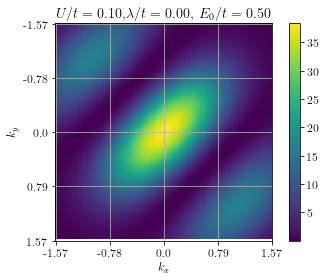

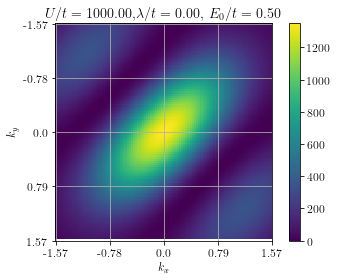

In [8]:
for U in Uar:
    for lamda in Lar:
        for delta_stag in dlar:
            for L in Lenar:
                final_out_fig(U, lamda, delta_stag, L)